## Import dataset, load files

https://www.kaggle.com/c/nyc-taxi-trip-duration

In [1]:
!pip install kaggle
!pip install selenium
!npm install -g --unsafe-perm phantomjs-prebuilt

     |████████████████████████████████| 911kB 2.8MB/s 
npm WARN deprecated phantomjs-prebuilt@2.1.16: this package is now deprecated
/tools/node/bin/phantomjs -> /tools/node/lib/node_modules/phantomjs-prebuilt/bin/phantomjs

> phantomjs-prebuilt@2.1.16 install /tools/node/lib/node_modules/phantomjs-prebuilt
> node install.js

Considering PhantomJS found at /tools/node/bin/phantomjs
Looks like an `npm install -g`
Could not link global install, skipping...
Saving to /tmp/phantomjs/phantomjs-2.1.1-linux-x86_64.tar.bz2
Receiving...
  [] 0%
Received 22866K total.
Extracting tar contents (via spawned process)
Removing /tools/node/lib/node_modules/phantomjs-prebuilt/lib/phantom
Copying extracted folder /tmp/phantomjs/phantomjs-2.1.1-linux-x86_64.tar.bz2-extract-1580380037351/phantomjs-2.1.1-linux-x86_64 -> /tools/node/lib/node_modules/phantomjs-prebuilt/lib/phantom
Writing location.js file
Done. Phantomjs binary available at /tools/node/lib/node_modules/phantomjs-prebuilt/lib/phantom/bin/phan

In [0]:
from google.colab import files
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

download del dataset direttamente da kaggle uplodare il file kaggle.json che si scarica dal proprio account kaggle

In [5]:
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

import kaggle
!kaggle competitions download -c nyc-taxi-trip-duration

!mkdir train
!unzip train.zip -d train

!mkdir test
!unzip test.zip -d test

Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                            title                                                size  lastUpdated          downloadCount  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
harvardlil/caselaw-dataset-illinois                            Caselaw Dataset (Illinois)                          929MB  2018-12-04 21:22:53            321  
stefanoleone992/fifa-20-complete-player-dataset                FIFA 20 complete player dataset                      15MB  2019-09-26 20:19:33           4253  
mkechinov/ecommerce-behavior-data-from-multi-category-store    eCommerce behavior data from multi category store     4GB  2019-12-09 20:43:39            914  
timesler/facenet-pytorch-vggface2                              facenet pytorch vggface2                        

In [0]:
!mkdir plots

In [0]:
train = pd.read_csv("/content/train/train.csv")
test = pd.read_csv("/content/test/test.csv")

## Analisi preliminari dei dataset

In [8]:
train.shape

(1458644, 11)

### Check for missing values

In [9]:
# count all NaN in a DataFrame (both columns & rows)
train.isnull().sum().sum()

0

In [10]:
# count all NaN in a DataFrame (both columns & rows)
test.isnull().sum().sum()

0

### Check the consistency of pickup and dropoff datetime

In [11]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['dropoff_datetime'] = pd.to_datetime(train['dropoff_datetime'])
train.dtypes


id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

In [12]:
train['pickup > dropoff'] = train['pickup_datetime'] > train['dropoff_datetime']
train['pickup > dropoff'].value_counts()

False    1458644
Name: pickup > dropoff, dtype: int64

Nessun record ha discrepranza con la data di pickup con la data di dropoff

In [0]:
train = train.drop(columns=['pickup > dropoff'])

In [14]:
train['trip_duration < 0'] = train['trip_duration'] < 0
train['trip_duration < 0'].value_counts()

False    1458644
Name: trip_duration < 0, dtype: int64

In [0]:
train = train.drop(columns=['trip_duration < 0'])

### Feature visualisation

In [0]:
import folium

In [17]:
int(train.shape[0]/1000)

1458

In [18]:
# plot di 1000 punti
m = folium.Map(location=[40.767936706543, -73.9821548461914])
for i in range(0, train.shape[0], int(train.shape[0]/1000)): 
  folium.CircleMarker([train.iloc[i].pickup_latitude, train.iloc[i].pickup_longitude], radius=1).add_to(m)
  #folium.CircleMarker([train.iloc[i].dropoff_latitude, train.iloc[i].dropoff_longitude], radius=1, color='red').add_to(m)

m

In [19]:
m = folium.Map(location=[40.767936706543, -73.9821548461914])
for i in range(0, train.shape[0], int(train.shape[0]/1000)): 
  folium.CircleMarker([train.iloc[i].dropoff_latitude, train.iloc[i].dropoff_longitude], radius=1, color='red').add_to(m)

m

In [0]:
df = train
df = df.sort_values(by=['pickup_longitude', 'pickup_latitude'])

In [21]:
# plot dei punti di partenza compresi gli outliers 
m = folium.Map(location=[40.767936706543, -73.9821548461914])
number_point = 1400
for i in range(0, number_point): 
  folium.CircleMarker([df.iloc[i].pickup_latitude, df.iloc[i].pickup_longitude], radius=1).add_to(m)
for i in range(train.shape[0] - number_point, train.shape[0]): 
  folium.CircleMarker([df.iloc[i].pickup_latitude, df.iloc[i].pickup_longitude], radius=1).add_to(m)
m

In [0]:
df = train
df = df.sort_values(by=['dropoff_longitude', 'dropoff_latitude'])

In [23]:
# plot dei punti di partenza compresi gli outliers 
m = folium.Map(location=[40.767936706543, -73.9821548461914])
number_point = 1000
for i in range(0, number_point): 
  folium.CircleMarker([df.iloc[i].dropoff_latitude, df.iloc[i].dropoff_longitude], radius=1, color='red').add_to(m)
for i in range(train.shape[0] - number_point, train.shape[0]): 
  folium.CircleMarker([df.iloc[i].dropoff_latitude, df.iloc[i].dropoff_longitude], radius=1, color='red').add_to(m)
m

### Trip duration


In [24]:
print(min(train.trip_duration))
# valore max decisamente molto alto
print(max(train.trip_duration))

1
3526282


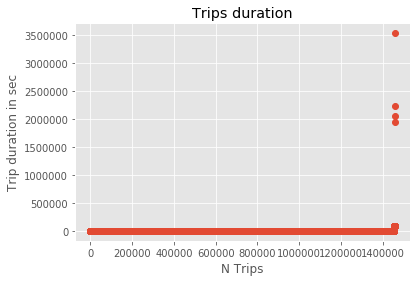

In [25]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(range(0, len(train)), train.trip_duration.sort_values(), 'o')
#plt.show()

plt.title("Trips duration")
plt.xlabel("N Trips")
plt.ylabel("Trip duration in sec")
plt.savefig("/content/plots/trip_duration_plot.png", dpi=600)

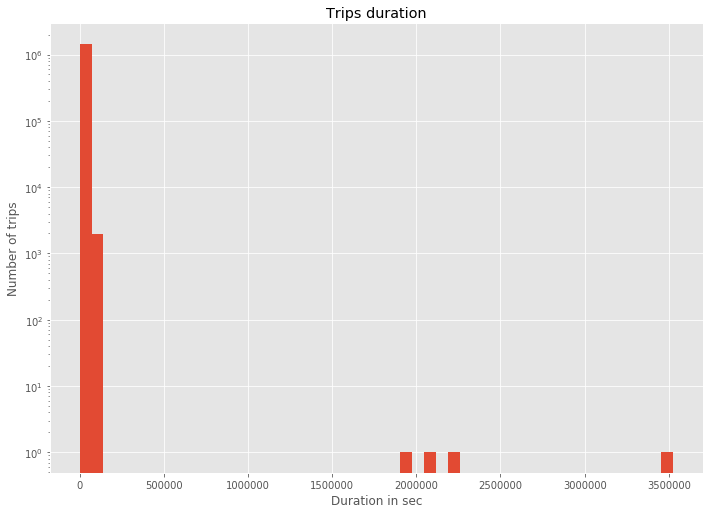

In [26]:
# istogramma lineare (si notano molto bene gli outliers)
num_bins = 50
plt.style.use('ggplot')
plt.subplots(figsize=(11.7, 8.27))
n, bins, patches = plt.hist(train.trip_duration, num_bins)
#plt.show()
plt.yscale('log')
plt.title("Trips duration")
plt.xlabel("Duration in sec")
plt.ylabel("Number of trips")
plt.savefig("/content/plots/trip_duration_histogram.png", dpi=600)

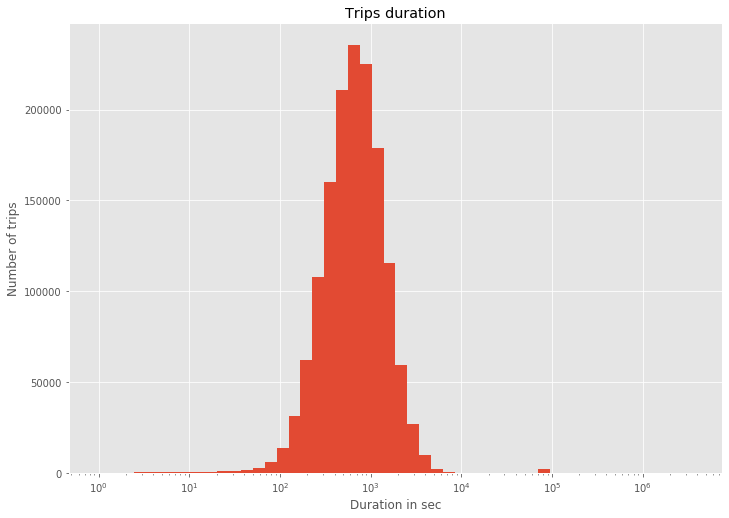

In [27]:
# istogramma logaritmico
num_bins = 150
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.subplots(figsize=(11.7, 8.27))
n, bins, patches = plt.hist(train.trip_duration, logbins)
plt.xscale('log')
#plt.show()

plt.title("Trips duration")
plt.xlabel("Duration in sec")
plt.ylabel("Number of trips")
plt.savefig("/content/plots/trip_duration_histogram_log.png", dpi=600)


### Pickup datetime / Dropoff datetime


In [28]:
# durata media dei viaggi
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)
train['date'] = train['pickup_datetime'].dt.date
train.head()

ts_v1 = pd.DataFrame(train.loc[train.vendor_id==1].groupby('date')['trip_duration'].mean())
ts_v1.reset_index(inplace = True)
ts_v2 = pd.DataFrame(train.loc[train.vendor_id==2].groupby('date')['trip_duration'].mean())
ts_v2.reset_index(inplace = True)

from bokeh.palettes import Spectral4
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import Legend
#from bokeh.sampledata.stocks import AAPL, IBM, MSFT, GOOG
output_notebook()
p = figure(plot_width=800, plot_height=250, x_axis_type="datetime", toolbar_location="above")
p.title.text = 'Average trip time'
p.xaxis.axis_label = "Day"
p.yaxis.axis_label = "Time in seconds"

legends = []
for data, name, color in zip([ts_v1, ts_v2], ["vendor 1", "vendor 2"], Spectral4):
    df = data
    legends.append(p.line(df['date'], df['trip_duration'], line_width=2, color=color, alpha=0.8))

train = train.drop(columns=['date'])

legend = Legend(items=[
    ('Vendor 1' , [legends[0]]),
    ('Vendor 2' , [legends[1]]),
], location="center")

p.add_layout(legend, 'right')
p.legend.click_policy="hide"

from bokeh.io import export_svgs
p.output_backend = "svg"
export_svgs(p, filename="/content/plots/avg_trip_time.svg")
show(p)

In [29]:
# numero di viaggi in base all'orario della giornata
train['pickup_hour'] = train['pickup_datetime'].dt.hour
train.head()
train['count'] = '0'

ts_v1 = pd.DataFrame(train.loc[train.vendor_id==1].groupby('pickup_hour')['count'].count())
ts_v1.reset_index(inplace = True)
ts_v2 = pd.DataFrame(train.loc[train.vendor_id==2].groupby('pickup_hour')['count'].count())
ts_v2.reset_index(inplace = True)

from bokeh.palettes import Spectral4
from bokeh.plotting import figure, output_notebook, show
#from bokeh.sampledata.stocks import AAPL, IBM, MSFT, GOOG
output_notebook()
p = figure(plot_width=800, plot_height=250, toolbar_location="above")
p.title.text = 'Number of trips during the day'
p.xaxis.axis_label = "Hour of the day"
p.yaxis.axis_label = "Number of trips"

legends = []
for data, name, color in zip([ts_v1, ts_v2], ["vendor 1", "vendor 2"], Spectral4):
    df = data
    legends.append(p.circle(df['pickup_hour'], df['count'], line_width=5, color=color, alpha=0.8))

train = train.drop(columns=['pickup_hour'])

legend = Legend(items=[
    ('Vendor 1' , [legends[0]]),
    ('Vendor 2' , [legends[1]]),
], location="center")

p.add_layout(legend, 'right')
p.legend.click_policy="hide"

from bokeh.io import export_svgs
p.output_backend = "svg"
export_svgs(p, filename="/content/plots/number_of_trip_hour.svg")
show(p)

In [30]:
# numero di viaggi in base al girno della settimana
train['day_week'] = train['pickup_datetime'].dt.day_name()
train.head()
train['count'] = '0'

ts_v1 = pd.DataFrame(train.loc[train['vendor_id']==1].groupby('day_week')['count'].count())
ts_v1.reset_index(inplace = True)
ts_v2 = pd.DataFrame(train.loc[train.vendor_id==2].groupby('day_week')['count'].count())
ts_v2.reset_index(inplace = True)

from bokeh.palettes import Spectral4
from bokeh.plotting import figure, output_notebook, show
#from bokeh.sampledata.stocks import AAPL, IBM, MSFT, GOOG
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
p = figure(plot_width=800, plot_height=250, x_range= days, toolbar_location="above")
p.title.text = 'Number of trips by week day'
p.xaxis.axis_label = "Day of the week"
p.yaxis.axis_label = "Number of trips"

legends = []
for data, name, color in zip([ts_v1, ts_v2], ["vendor 1", "vendor 2"], Spectral4):
    df = data
    legends.append(p.circle(df['day_week'], df['count'], line_width=8, color=color, alpha=0.8))

train = train.drop(columns=['day_week'])

legend = Legend(items=[
    ('Vendor 1' , [legends[0]]),
    ('Vendor 2' , [legends[1]]),
], location="center")

p.add_layout(legend, 'right')
p.legend.click_policy="hide"

from bokeh.io import export_svgs
p.output_backend = "svg"
export_svgs(p, filename="/content/plots/number_trip_week_day.svg")
show(p)

In [31]:
# numero di viaggi in base all\'orario della giornata in base al mese
import calendar

train['month'] = train['pickup_datetime'].dt.month_name()
train['pickup_hour'] = train['pickup_datetime'].dt.hour
train.head()

ts_v1 = pd.DataFrame(train.groupby(['month', 'pickup_hour'])['count'].count())
ts_v1.reset_index(inplace = True)
ts_v1

from bokeh.palettes import Spectral6
from bokeh.plotting import figure, output_notebook, show
output_notebook()
p = figure(plot_width=800, plot_height=250, toolbar_location="above")
p.title.text = 'Number of trips by hour and month'
p.xaxis.axis_label = "Hour of the day"
p.yaxis.axis_label = "Number of trips"

cal = []
for i in range(0, 7):
    cal = cal + [calendar.month_name[i]]
cal.pop(0)

ts_all = [pd.DataFrame(ts_v1[ts_v1['month'] == calendar.month_name[1]])]
#print(ts_all)
for i in range(2, 7):
  ts_all = ts_all + [pd.DataFrame(ts_v1[ts_v1['month'] == calendar.month_name[i]])]

legends = []
for data, name, color in zip(ts_all, cal, Spectral6):
  df = data
  legends.append(p.line(df['pickup_hour'], df['count'], line_width=5, color=color, alpha=0.8))

train = train.drop(columns=['pickup_hour', 'month'])

legend = Legend(items=[
    (cal[0], [legends[0]]),
    (cal[1], [legends[1]]),
    (cal[2], [legends[2]]),
    (cal[3], [legends[3]]),
    (cal[4], [legends[4]]),
    (cal[5], [legends[5]]),
], location="center")

p.add_layout(legend, 'right')
p.legend.click_policy="hide"

from bokeh.io import export_svgs
p.output_backend = "svg"
export_svgs(p, filename="/content/plots/number_of_trip_hour_month.svg")
show(p)

In [32]:
# numero di viaggi in base all\'orario della giornata in base al giorno della settimana
#import calendar
train['day_week'] = train['pickup_datetime'].dt.day_name()
train['pickup_hour'] = train['pickup_datetime'].dt.hour
train.head()

ts_v1 = pd.DataFrame(train.groupby(['day_week', 'pickup_hour'])['count'].count())
ts_v1.reset_index(inplace = True)
ts_v1

from bokeh.palettes import Spectral7
from bokeh.plotting import figure, output_notebook, show
output_notebook()
p = figure(plot_width=800, plot_height=250, toolbar_location="above")
p.title.text = 'Number of trips by hour and week day'
p.xaxis.axis_label = "Hour of the day"
p.yaxis.axis_label = "Number of trips"


days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ts_all = [pd.DataFrame(ts_v1[ts_v1['day_week'] == calendar.day_name[0]])]
#print(ts_all)
for i in range(1, 7):
  ts_all = ts_all + [pd.DataFrame(ts_v1[ts_v1['day_week'] == calendar.day_name[i]])]

legends = []
for data, name, color in zip(ts_all, days, Spectral7):
  df = data
  legends.append(p.line(df['pickup_hour'], df['count'], line_width=5, color=color, alpha=0.8))

train = train.drop(columns=['pickup_hour', 'day_week', 'count'])

legend = Legend(items=[
    (days[0], [legends[0]]),
    (days[1], [legends[1]]),
    (days[2], [legends[2]]),
    (days[3], [legends[3]]),
    (days[4], [legends[4]]),
    (days[5], [legends[5]]),
    (days[6], [legends[6]]),
], location="center")

p.add_layout(legend, 'right')
p.legend.click_policy="hide"

from bokeh.io import export_svgs
p.output_backend = "svg"
export_svgs(p, filename="/content/plots/number_of_trip_day_hour.svg")
show(p)

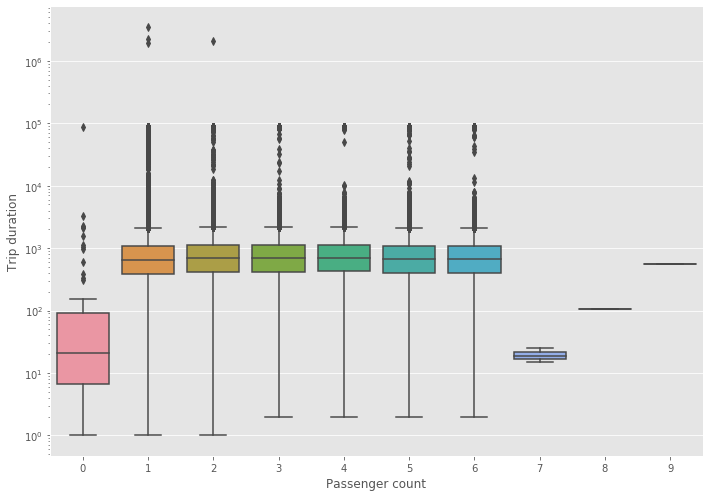

In [33]:
import seaborn as sns
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(11.7, 8.27))
ax = sns.boxplot(x="passenger_count", y="trip_duration", data=train)
#ax.set(font_scale=3)
ax.set(yscale="log")
ax.set(xlabel = 'Passenger count', ylabel = 'Trip duration')
plt.show()
ax.get_figure().savefig('/content/plots/passengers_per_trip.png')

### Passenger count

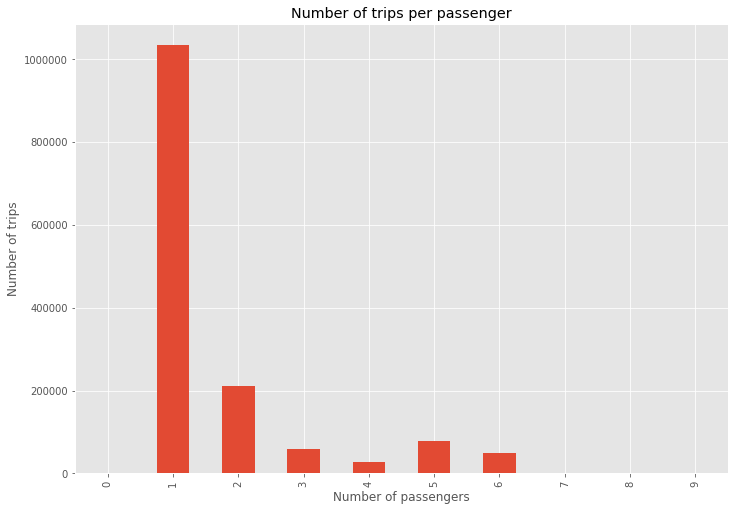

In [34]:
fig = train.passenger_count.value_counts().sort_index().plot(kind="bar", figsize=(11.7, 8.27))
plt.title("Number of trips per passenger")
plt.xlabel("Number of passengers")
plt.ylabel("Number of trips")

plt.show()
fig.get_figure().savefig('/content/plots/passengers_count.png')

In [35]:
train.passenger_count.value_counts().sort_index()

0         60
1    1033540
2     210318
3      59896
4      28404
5      78088
6      48333
7          3
8          1
9          1
Name: passenger_count, dtype: int64

### Vendor id

In [0]:
# n, bins, patches = plt.hist(train.vendor_id, num_bins, ec='black')
# plt.xticks(np.arange(1, 3))
# plt.show()

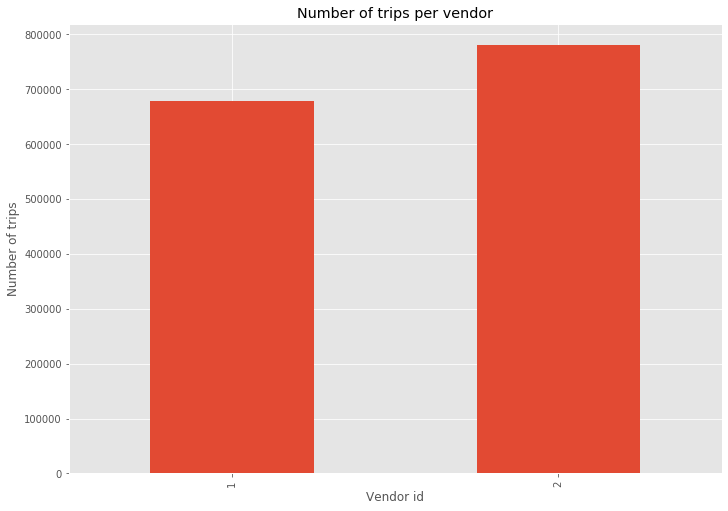

In [37]:
fig = train.vendor_id.value_counts().sort_index().plot(kind="bar", figsize=(11.7, 8.27))
plt.title("Number of trips per vendor")
plt.xlabel("Vendor id")
plt.ylabel("Number of trips")
plt.show()

fig.get_figure().savefig('/content/plots/count_vendor_trip.png')

## Clustering cordiante

In [0]:
from sklearn.cluster import MiniBatchKMeans

coords = np.vstack((train[['pickup_latitude', 'pickup_longitude']].values,
                        train[['dropoff_latitude', 'dropoff_longitude']].values))

sample_ind = np.random.permutation(len(coords))
kmeans = MiniBatchKMeans(n_clusters=200, batch_size=10000).fit(coords[sample_ind])
train.loc[:, 'pickup_cluster'] = kmeans.predict(train[['pickup_latitude', 'pickup_longitude']])
train.loc[:, 'dropoff_cluster'] = kmeans.predict(train[['dropoff_latitude', 'dropoff_longitude']])

In [107]:
train.head()

id  vendor_id  ... dropoff_cluster        date
0  id2875421          2  ...              17  2016-03-14
1  id2377394          1  ...             196  2016-06-12
2  id3858529          2  ...             108  2016-01-19
3  id3504673          2  ...              19  2016-04-06
4  id2181028          2  ...              76  2016-03-26

[5 rows x 14 columns]

### Visualizzazione cluster

In [0]:
def draw_map_zone( df, x_name, y_name, z_name, name, zoom=0.9, cluster=None ):

    x = df[x_name]
    y = df[y_name]
    z = df[z_name]

    cutmap = zoom/1000
    x_max, x_min = x.quantile(1-cutmap), x.quantile(cutmap)
    y_max, y_min = y.quantile(1-cutmap), y.quantile(cutmap)
    
    zones = np.unique(z[(x>x_min) & (x<x_max) & (y<y_max) & (y>y_min)])

    #cmap = plt.get_cmap('spectral') 
    cmap = plt.get_cmap('winter') 
    colors = [cmap(i) for i in np.linspace(0, 1, len(zones))]

    for i, zone in enumerate(zones):       
        plt.scatter( x=x[ (z==zone) & (x>x_min) & (x<x_max) & (y<y_max) & (y>y_min) ], 
                     y=y[ (z==zone) & (x>x_min) & (x<x_max) & (y<y_max) & (y>y_min) ], 
                     s=5, alpha=0.3, c=colors[i])
        if cluster:
            plt.text(cluster.cluster_centers_[zone,0], cluster.cluster_centers_[zone,1], str(zone), fontsize = 12, color='r', clip_on=True)

    plt.tick_params(labelsize=18)
    plt.title(name, fontsize=18 )
    plt.xlabel('Longitude', fontsize=18)
    plt.ylabel('Latitude',  fontsize=18)
          
def draw_sub_zone( data, marker='*' ):
    x=data['longitude']
    y=data['latitude']
    z=data['zone']
    
    zones = np.unique(z)
    
    cmap = plt.get_cmap('spring') 
    colors = [cmap(i) for i in np.linspace(0, 1, len(zones))]
 
    for i, zone in enumerate(zones):       
        plt.scatter( x=x[ z==zone ], 
                     y=y[ z==zone ], 
                     c=colors[i], marker=marker)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

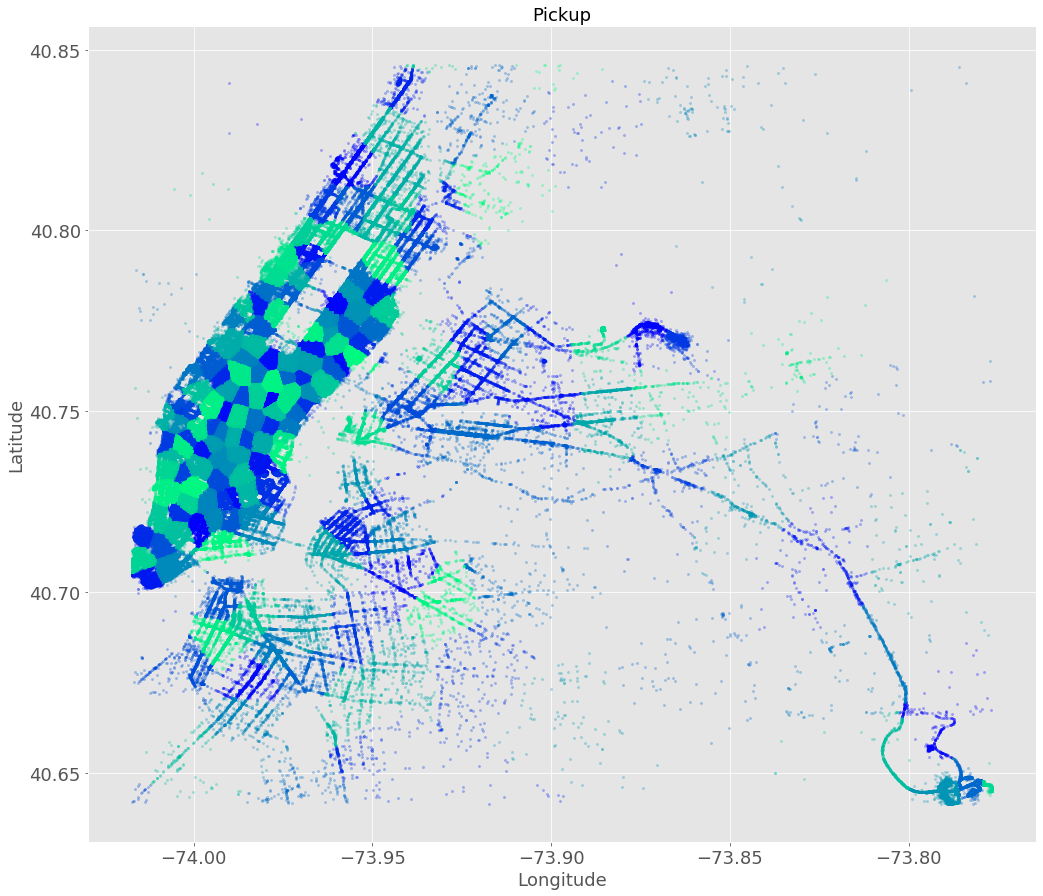

In [110]:

plt.figure(figsize=(17,15))
draw_map_zone(train, 'pickup_longitude', 'pickup_latitude', 'pickup_cluster', 'Pickup', cluster=kmeans)
#draw_sub_zone(df_sub)
# non stampa i numeri dei cluster
plt.savefig('/content/plots/cluster.png')

## Join dataset with weather

In [55]:
!kaggle datasets list

!kaggle datasets download -d mathijs/weather-data-in-new-york-city-2016
!mkdir weather
!unzip weather-data-in-new-york-city-2016.zip -d weather

ref                                                            title                                                size  lastUpdated          downloadCount  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
harvardlil/caselaw-dataset-illinois                            Caselaw Dataset (Illinois)                          929MB  2018-12-04 21:22:53            325  
mkechinov/ecommerce-behavior-data-from-multi-category-store    eCommerce behavior data from multi category store     4GB  2019-12-09 20:43:39            916  
stefanoleone992/fifa-20-complete-player-dataset                FIFA 20 complete player dataset                      15MB  2019-09-26 20:19:33           4259  
vijayabhaskar96/tamil-news-classification-dataset-tamilmurasu  Tamil News Classification Dataset (Tamilmurasu)      95MB  2020-01-09 06:51:33             44  
timesler/facenet-pytorch-vggface2             

In [0]:
weather = pd.read_csv("/content/weather/weather_data_nyc_centralpark_2016(1).csv")

In [57]:
weather.head()

date  maximum temperature  ...  snow fall  snow depth
0  1-1-2016                   42  ...        0.0           0
1  2-1-2016                   40  ...        0.0           0
2  3-1-2016                   45  ...        0.0           0
3  4-1-2016                   36  ...        0.0           0
4  5-1-2016                   29  ...        0.0           0

[5 rows x 7 columns]

In [0]:
# join weather dataset with new york city taxi trip duration
train['date'] = train['pickup_datetime'].dt.date
weather['date'] = pd.to_datetime(weather.date)
weather['date'] = weather['date'].dt.date
data_with_weather = pd.merge(weather, train, how='right', on=['date'])

In [0]:
data_with_weather['maximum temperature'] = (data_with_weather['maximum temperature'] - 32) / 1.8
data_with_weather['minimum temperature'] = (data_with_weather['minimum temperature'] - 32) / 1.8
data_with_weather['average temperature'] = (data_with_weather['average temperature'] - 32) / 1.8

In [60]:
data_with_weather.head()

date  maximum temperature  ...  pickup_cluster  dropoff_cluster
0  2016-01-01             5.555556  ...              70              196
1  2016-01-01             5.555556  ...             170              142
2  2016-01-01             5.555556  ...              91               54
3  2016-01-01             5.555556  ...              59              199
4  2016-01-01             5.555556  ...              22              157

[5 rows x 20 columns]

In [61]:
print(data_with_weather.shape)
print(train.shape)
print(data_with_weather.isnull().sum().sum())

(1458644, 20)
(1458644, 14)
0


In [62]:
data_with_weather.precipitation.value_counts().sort_index()

0       202930
0.00    712829
0.01     31329
0.02     31028
0.03      7683
0.04     34119
0.05     32039
0.06      7248
0.07     15993
0.09     16982
0.11      8084
0.12      7253
0.14      7828
0.16     23933
0.18      7762
0.19      8524
0.22      8544
0.24     16655
0.25      8476
0.29      8091
0.30      8172
0.35      7112
0.38      7233
0.40      8468
0.44      7373
0.45      7311
0.47      7891
0.49      8669
0.5       8578
0.53      7344
0.54      7589
0.61      9597
0.66      9285
0.73      8578
0.83      7649
0.91      9202
1.01      7646
1.22      8442
1.65      5570
2.31      1648
T       107957
Name: precipitation, dtype: int64

In [0]:
# per la pioggia T diventa 0.01
data_with_weather.loc[data_with_weather.precipitation == 'T', 'precipitation'] = '0.005'

In [0]:
data_with_weather = data_with_weather.rename(columns={'snow fall':'snow_fall', 
                      'snow depth':'snow_depth', 
                      'maximum temperature':'maximum_temperature', 
                      'minimum temperature':'minimum_temperature',
                      'average temperature':'average_temperature'})

In [65]:
data_with_weather['snow_fall'].value_counts().sort_index()

0        294364
0.0     1063582
0.2        8805
0.4       15975
0.5        7248
1.4        7373
2.5        7344
27.3       1648
T         52305
Name: snow_fall, dtype: int64

In [66]:
data_with_weather['snow_depth'].value_counts().sort_index()

0     1339426
1        7344
17       6941
19       6084
2        6512
22       3383
4        7670
6       27615
9        7571
T       46098
Name: snow_depth, dtype: int64

In [0]:
# consideriamo diverso il valore di T per snow fall e snow depth 
# per snow fall T è 0.1 inches (valore più piccolo nella scala)
# per snow depth T è 0.5 inches (nuovo valore nella scala)
data_with_weather.loc[data_with_weather.snow_fall == 'T', 'snow_fall'] = '0.1'
data_with_weather.loc[data_with_weather.snow_depth == 'T', 'snow_depth'] = '0.5'

In [68]:
data_with_weather['precipitation'] = pd.to_numeric(data_with_weather['precipitation'])
data_with_weather['snow_fall'] = pd.to_numeric(data_with_weather['snow_fall'])
data_with_weather['snow_depth'] = pd.to_numeric(data_with_weather['snow_depth'])
data_with_weather.dtypes

date                           object
maximum_temperature           float64
minimum_temperature           float64
average_temperature           float64
precipitation                 float64
snow_fall                     float64
snow_depth                    float64
id                             object
vendor_id                       int64
pickup_datetime        datetime64[ns]
dropoff_datetime       datetime64[ns]
passenger_count                 int64
pickup_longitude              float64
pickup_latitude               float64
dropoff_longitude             float64
dropoff_latitude              float64
store_and_fwd_flag             object
trip_duration                   int64
pickup_cluster                  int32
dropoff_cluster                 int32
dtype: object

In [0]:
# trasformazione da inches a centimetri di snow_fall, snow_depth, precipitation
data_with_weather['precipitation'] = data_with_weather['precipitation'] * 2.54
data_with_weather['snow_fall'] = data_with_weather['snow_fall'] * 2.54
data_with_weather['snow_depth'] = data_with_weather['snow_depth'] * 2.54

In [0]:
#data_with_weather.to_csv("/content/data_with_weather.csv")

## Join dataset (already joined with weather) with osm

In [71]:
!kaggle datasets list
!kaggle datasets download -d oscarleo/new-york-city-taxi-with-osrm
!mkdir osm
!unzip new-york-city-taxi-with-osrm.zip -d osm
!rm osm/test.csv
!rm osm/train.csv


ref                                                            title                                                size  lastUpdated          downloadCount  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
harvardlil/caselaw-dataset-illinois                            Caselaw Dataset (Illinois)                          929MB  2018-12-04 21:22:53            325  
mkechinov/ecommerce-behavior-data-from-multi-category-store    eCommerce behavior data from multi category store     4GB  2019-12-09 20:43:39            916  
stefanoleone992/fifa-20-complete-player-dataset                FIFA 20 complete player dataset                      15MB  2019-09-26 20:19:33           4259  
vijayabhaskar96/tamil-news-classification-dataset-tamilmurasu  Tamil News Classification Dataset (Tamilmurasu)      95MB  2020-01-09 06:51:33             44  
timesler/facenet-pytorch-vggface2             

In [0]:
fastest_routes_1 = pd.read_csv("/content/osm/fastest_routes_train_part_1.csv")
fastest_routes_2 = pd.read_csv("/content/osm/fastest_routes_train_part_2.csv")

In [0]:
# unione fastest routes 1 e 2 in un unico dataset
osm_merged = fastest_routes_1.append(fastest_routes_2)

In [74]:
print(fastest_routes_1.shape)
print(fastest_routes_2.shape)
print(osm_merged.shape)

(700000, 12)
(758643, 12)
(1458643, 12)


In [75]:
osm_merged.head()

id  ...                                 step_location_list
0  id2875421  ...  -73.982316,40.767869|-73.981997,40.767688|-73....
1  id2377394  ...  -73.980429,40.73857|-73.985444,40.731658|-73.9...
2  id3504673  ...  -74.010145,40.719982|-74.011527,40.714294|-74....
3  id2181028  ...  -73.972998,40.793187|-73.976607,40.788361|-73....
4  id0801584  ...  -73.982805,40.742173|-73.982914,40.742024|-73....

[5 rows x 12 columns]

In [0]:
data_weather_osm = pd.merge(osm_merged, data_with_weather, how='right', on=['id'])

In [77]:
data_weather_osm.head()

id   starting_street  ... pickup_cluster  dropoff_cluster
0  id2875421   Columbus Circle  ...            174              150
1  id2377394        2nd Avenue  ...             21               27
2  id3504673  Greenwich Street  ...            176               97
3  id2181028          Broadway  ...            138                0
4  id0801584  Lexington Avenue  ...             45              136

[5 rows x 31 columns]

In [78]:
print(data_weather_osm.shape)
print(data_with_weather.shape)

(1458644, 31)
(1458644, 20)


In [79]:
data_weather_osm.dtypes

id                              object
starting_street                 object
end_street                      object
total_distance                 float64
total_travel_time              float64
number_of_steps                float64
street_for_each_step            object
distance_per_step               object
travel_time_per_step            object
step_maneuvers                  object
step_direction                  object
step_location_list              object
date                            object
maximum_temperature            float64
minimum_temperature            float64
average_temperature            float64
precipitation                  float64
snow_fall                      float64
snow_depth                     float64
vendor_id                        int64
pickup_datetime         datetime64[ns]
dropoff_datetime        datetime64[ns]
passenger_count                  int64
pickup_longitude               float64
pickup_latitude                float64
dropoff_longitude        

In [80]:
data_weather_osm[data_weather_osm.isnull().any(axis=1)]

id starting_street  ... pickup_cluster  dropoff_cluster
1458643  id3008062             NaN  ...             23               23

[1 rows x 31 columns]

In [81]:
data_weather_osm = data_weather_osm.dropna()
print(data_weather_osm.shape)

(1458643, 31)


## aggiungo colonna per identificare se il viaggio parte o arriva in un aereoporto


In [82]:
data_weather_osm.pickup_latitude[0]

40.76793670654297

In [83]:
import geopy.distance
from numba import jit
import time
start = time.time()

jfk_coord = (40.639722, -73.778889)
la_guardia_coord = (40.77725, -73.872611)

distance_jfk_start = []
distance_jfk_end = []
distance_guardia_start = []
distance_guardia_end = []
for index, row in data_weather_osm.iterrows():
  distance_jfk_start.append(geopy.distance.distance(jfk_coord, (row.pickup_latitude, row.pickup_longitude)).km)
  distance_jfk_end.append(geopy.distance.distance(jfk_coord, (row.dropoff_latitude, row.dropoff_longitude)).km)

  distance_guardia_start.append(geopy.distance.distance(la_guardia_coord, (row.pickup_latitude, row.pickup_longitude)).km)
  distance_guardia_end.append(geopy.distance.distance(la_guardia_coord, (row.dropoff_latitude, row.dropoff_longitude)).km)
end = time.time()
print(end-start)

1883.7887244224548


In [0]:
#import geopy.distance
#import time
#start = time.time()

#jfk_coord = (40.639722, -73.778889)
#la_guardia_coord = (40.77725, -73.872611)
     
#distance_jfk_start = [geopy.distance.distance(jfk_coord, (data[1].pickup_latitude, data[1].pickup_longitude)).km for data in data_weather_osm.iterrows()]
#distance_jfk_end = [geopy.distance.distance(jfk_coord, (data[1].dropoff_latitude, data[1].dropoff_longitude)).km for data in data_weather_osm.iterrows()]

#distance_guardia_start = [geopy.distance.distance(la_guardia_coord, (data[1].pickup_latitude, data[1].pickup_longitude)).km for data in data_weather_osm.iterrows()]
#distance_guardia_end = [geopy.distance.distance(la_guardia_coord, (data[1].dropoff_latitude, data[1].dropoff_longitude)).km for data in data_weather_osm.iterrows()]

#end = time.time()
#print(end-start)

In [0]:
data_weather_osm['JFK_start'] = distance_jfk_start
data_weather_osm['JFK_start'] = data_weather_osm['JFK_start'] < 2

data_weather_osm['JFK_end'] = distance_jfk_end
data_weather_osm['JFK_end'] = data_weather_osm['JFK_end'] < 2

data_weather_osm['guardia_start'] = distance_guardia_start
data_weather_osm['guardia_start'] = data_weather_osm['guardia_start'] < 2

data_weather_osm['guardia_end'] = distance_guardia_end
data_weather_osm['guardia_end'] = data_weather_osm['guardia_end'] < 2



In [86]:
print(data_weather_osm['JFK_start'].value_counts())
print(data_weather_osm['JFK_end'].value_counts())
print(data_weather_osm['guardia_start'].value_counts())
print(data_weather_osm['guardia_end'].value_counts())

False    1427240
True       31403
Name: JFK_start, dtype: int64
False    1446711
True       11932
Name: JFK_end, dtype: int64
False    1421509
True       37134
Name: guardia_start, dtype: int64
False    1440149
True       18494
Name: guardia_end, dtype: int64


In [0]:
data_weather_osm['pickup_hour'] = data_weather_osm['pickup_datetime'].dt.hour
data_weather_osm['pickup_minute'] = data_weather_osm['pickup_datetime'].dt.minute
data_weather_osm['pickup_day_week'] = data_weather_osm['pickup_datetime'].dt.dayofweek

In [148]:
data_weather_osm.head()

id   starting_street  ... pickup_minute  pickup_day_week
0  id2875421   Columbus Circle  ...            24                0
1  id2377394        2nd Avenue  ...            43                6
2  id3504673  Greenwich Street  ...            32                2
3  id2181028          Broadway  ...            30                5
4  id0801584  Lexington Avenue  ...             1                5

[5 rows x 38 columns]

In [0]:
data_weather_osm.to_csv("/content/data_weather_osm.csv", index=False)

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp /content/data_weather_osm.csv "/content/drive/My Drive/UnimiB/Magistrale/Secondo Anno/Advanced Machine Learning/Progetto AML/"

#Plot weather and distance

In [92]:
data_weather_osm.head()

id   starting_street  ... pickup_minute  pickup_day_week
0  id2875421   Columbus Circle  ...            24                0
1  id2377394        2nd Avenue  ...            43                6
2  id3504673  Greenwich Street  ...            32                2
3  id2181028          Broadway  ...            30                5
4  id0801584  Lexington Avenue  ...             1                5

[5 rows x 38 columns]

In [153]:
# Precipitazioni atmosferiche

ts_v1 = pd.DataFrame(data_weather_osm.groupby('date')['snow_fall'].mean())
ts_v1.reset_index(inplace = True)
ts_v2 = pd.DataFrame(data_weather_osm.groupby('date')['snow_depth'].mean())
ts_v2.reset_index(inplace = True)
ts_v3 = pd.DataFrame(data_weather_osm.groupby('date')['precipitation'].mean())
ts_v3.reset_index(inplace = True)

ts_v1 = ts_v1[:40]
ts_v2 = ts_v2[:40]
ts_v3 = ts_v3[:40]

from bokeh.palettes import Spectral4
from bokeh.plotting import figure, output_notebook, show
#from bokeh.sampledata.stocks import AAPL, IBM, MSFT, GOOG
output_notebook()
p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")
p.title.text = 'Precipitazioni atmosferiche'

col_name = ["snow_fall", "snow_depth", "precipitation"]

legends = []
for data, name, color in zip([ts_v1, ts_v2, ts_v3], col_name, Spectral4):
    df = data
    legends.append(p.line(df['date'], df[name], line_width=2, color=color, alpha=0.8))

legend = Legend(items=[
    ('snow_fall', [legends[0]]),
    ('snow_depth', [legends[1]]),
    ('precipitation', [legends[2]]),
], location="center")

p.add_layout(legend, 'right')
p.legend.click_policy="hide"

from bokeh.io import export_svgs
p.output_backend = "svg"
export_svgs(p, filename="/content/plots/atmospheric_precipitation.svg")
show(p)


In [154]:
# Somma delle distaze per ogni giorno
ts_v1 = pd.DataFrame(data_weather_osm.groupby('date')['total_distance'].sum())
ts_v1.reset_index(inplace = True)
ts_v1 = ts_v1[:40]

from bokeh.palettes import Spectral4
from bokeh.plotting import figure, output_notebook, show
#from bokeh.sampledata.stocks import AAPL, IBM, MSFT, GOOG
output_notebook()
p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")
p.title.text = 'Somma delle distaze per ogni giorno'

col_name = ["total_distance"]

legends = []
for data, name, color in zip([ts_v1], col_name, Spectral4):
    df = data
    legends.append(p.line(df['date'], df[name], line_width=2, color=color, alpha=0.8))

legend = Legend(items=[
    ('total_distance', [legends[0]]),
], location="center")

p.add_layout(legend, 'right')
p.legend.click_policy="hide"

from bokeh.io import export_svgs
p.output_backend = "svg"
export_svgs(p, filename="/content/plots/km_trips_day.svg")
show(p)


#Create test_set

In [117]:
test = pd.read_csv("/content/test/test.csv")
test.shape

(625134, 9)

In [0]:
test.loc[:, 'pickup_cluster'] = kmeans.predict(test[['pickup_latitude', 'pickup_longitude']])
test.loc[:, 'dropoff_cluster'] = kmeans.predict(test[['dropoff_latitude', 'dropoff_longitude']])

In [0]:
weather = pd.read_csv("/content/weather/weather_data_nyc_centralpark_2016(1).csv")

In [0]:
# join weather dataset with new york city taxi trip duration
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])
test['date'] = test['pickup_datetime'].dt.date
weather['date'] = pd.to_datetime(weather.date)
weather['date'] = weather['date'].dt.date
data_with_weather = pd.merge(weather, test, how='right', on=['date'])

In [0]:
data_with_weather['maximum temperature'] = (data_with_weather['maximum temperature'] - 32) / 1.8
data_with_weather['minimum temperature'] = (data_with_weather['minimum temperature'] - 32) / 1.8
data_with_weather['average temperature'] = (data_with_weather['average temperature'] - 32) / 1.8

data_with_weather.loc[data_with_weather.precipitation == 'T', 'precipitation'] = '0.005'

data_with_weather = data_with_weather.rename(columns={'snow fall':'snow_fall', 
                      'snow depth':'snow_depth', 
                      'maximum temperature':'maximum_temperature', 
                      'minimum temperature':'minimum_temperature',
                      'average temperature':'average_temperature'})

data_with_weather.loc[data_with_weather.snow_fall == 'T', 'snow_fall'] = '0.1'
data_with_weather.loc[data_with_weather.snow_depth == 'T', 'snow_depth'] = '0.5'

data_with_weather['precipitation'] = pd.to_numeric(data_with_weather['precipitation'])
data_with_weather['snow_fall'] = pd.to_numeric(data_with_weather['snow_fall'])
data_with_weather['snow_depth'] = pd.to_numeric(data_with_weather['snow_depth'])

# trasformazione da inches a centimetri di snow_fall, snow_depth, precipitation
data_with_weather['precipitation'] = data_with_weather['precipitation'] * 2.54
data_with_weather['snow_fall'] = data_with_weather['snow_fall'] * 2.54
data_with_weather['snow_depth'] = data_with_weather['snow_depth'] * 2.54

In [0]:
osm = pd.read_csv("/content/osm/fastest_routes_test.csv")

In [0]:
test_weather_osm = pd.merge(osm, data_with_weather, how='right', on=['id'])

In [124]:
test_weather_osm.shape

(625134, 29)

In [125]:
import geopy.distance
from numba import jit
import time
start = time.time()

jfk_coord = (40.639722, -73.778889)
la_guardia_coord = (40.77725, -73.872611)

distance_jfk_start = []
distance_jfk_end = []
distance_guardia_start = []
distance_guardia_end = []
for index, row in test_weather_osm.iterrows():
  distance_jfk_start.append(geopy.distance.distance(jfk_coord, (row.pickup_latitude, row.pickup_longitude)).km)
  distance_jfk_end.append(geopy.distance.distance(jfk_coord, (row.dropoff_latitude, row.dropoff_longitude)).km)

  distance_guardia_start.append(geopy.distance.distance(la_guardia_coord, (row.pickup_latitude, row.pickup_longitude)).km)
  distance_guardia_end.append(geopy.distance.distance(la_guardia_coord, (row.dropoff_latitude, row.dropoff_longitude)).km)
end = time.time()
print(end-start)

test_weather_osm['JFK_start'] = distance_jfk_start
test_weather_osm['JFK_start'] = test_weather_osm['JFK_start'] < 2

test_weather_osm['JFK_end'] = distance_jfk_end
test_weather_osm['JFK_end'] = test_weather_osm['JFK_end'] < 2

test_weather_osm['guardia_start'] = distance_guardia_start
test_weather_osm['guardia_start'] = test_weather_osm['guardia_start'] < 2

test_weather_osm['guardia_end'] = distance_guardia_end
test_weather_osm['guardia_end'] = test_weather_osm['guardia_end'] < 2


824.6881659030914


In [0]:
test_weather_osm['pickup_hour'] = test_weather_osm['pickup_datetime'].dt.hour
test_weather_osm['pickup_minute'] = test_weather_osm['pickup_datetime'].dt.minute
test_weather_osm['pickup_day_week'] = test_weather_osm['pickup_datetime'].dt.dayofweek

In [146]:
test_weather_osm.loc[test_weather_osm.store_and_fwd_flag == 'N', 'store_and_fwd_flag'] = '0'
test_weather_osm.loc[test_weather_osm.store_and_fwd_flag == 'Y', 'store_and_fwd_flag'] = '1'

test_weather_osm = test_weather_osm.drop(columns=['date', 'pickup_datetime', 'starting_street', 'end_street', 'street_for_each_step', 'distance_per_step', 'travel_time_per_step', 'step_maneuvers', 'step_direction', 'step_location_list'])
test_weather_osm = test_weather_osm.drop(columns=['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])

test_weather_osm_1.shape

(625134, 22)

In [0]:
test_weather_osm.to_csv("/content/test_weather_osm.csv", index=False)
!cp /content/test_weather_osm.csv "/content/drive/My Drive/UnimiB/Magistrale/Secondo Anno/Advanced Machine Learning/Progetto AML/"